In [1]:
from tqdm.notebook import tqdm
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.alert import Alert

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager    # 매 번 크롬 드라이버를 설치할 필요없이 자동으로
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.alert import Alert
from tqdm import tqdm_notebook
from urllib.request import urlopen
import time
import requests
import re
import os
import win32com.client as win32
#pip install pypiwin32


# 엑셀 변환 함수
#def convert_xls_to_xlsx(xls_file_path, xlsx_file_path):
#    excel = win32.Dispatch("Excel.Application")
#    excel.DisplayAlerts = False
#    wb = excel.Workbooks.Open(xls_file_path)
#    wb.SaveAs(xlsx_file_path, FileFormat=51)  # FileFormat=51 corresponds to .xlsx
#     wb.Close()
#     excel.Quit()

    
#input_folder = 'C:\\Users\\acorn\\Downloads'
#output_folder = 'C:\\xlsx'


# for file_name in os.listdir(input_folder):
#     if file_name.endswith('.xls'):
#         input_file_path = os.path.join(input_folder, file_name)
#         output_file_name = file_name.replace('.xls', '.xlsx')
#         output_file_path = os.path.join(output_folder, output_file_name)

#         print(f"Converting {input_file_path} to {output_file_path}")
#         convert_xls_to_xlsx(input_file_path, output_file_path)
#         print(f"Conversion complete for {output_file_path}")
        
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]=False
# .pyplot 모듈

In [2]:
import pandas as pd

# 시리즈가 주는 관람객 수 증가량 
## csv파일 위치 : C:\GitTest\10M_Movie\movie_DB\raw_data\rank206
### 시리즈별 누적관람객수 

In [3]:
# 데이터 불러오기
data = pd.read_csv("C:\\GitTest\\10M_Movie\\movie_DB\individual_movie\\movie_info_final.csv")


movie_info = pd.DataFrame(data)
movie_info

,영화,개봉일,장르,영상등급,제작국가,스크린타입,감독,주연,누적관객수
0,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919
1,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338
2,신과함께-죄와 벌,2017-12-20,"판타지,드라마",12세이상관람가,한국,"2D,4D",김용화,"하정우,차태현,주지훈,김향기,마동석",14414658
3,국제시장,2014-12-17,드라마,12세이상관람가,한국,"필름,2D",윤제균,"황정민,김윤진,오달수,정진영",14264478
4,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602
...,...,...,...,...,...,...,...,...,...
195,신의 한 수,2014-07-03,"범죄,액션",청소년관람불가,한국,"필름,2D",조범구,"정우성,안성기,이범수,김인권,이시영,안길강,최진혁",3566852
196,코코,2018-01-11,애니메이션,전체관람가,미국,"2D,4D,IMAX",리 언크리치,"가엘 가르시아 베르날,앤서니 곤잘레스,벤자민 브랫",3516880
197,해리 포터와 불의 잔,2005-12-01,"액션,판타지",12세이상관람가,미국,"필름,4D",마이크 뉴웰,"다니엘 래드클리프,루퍼트 그린트,엠마 왓슨,랄프 파인즈",3499257
198,비긴 어게인,2014-08-13,멜로/로맨스,15세이상관람가,미국,"필름,2D",존 카니,"키이라 나이틀리,마크 러팔로,애덤 리바인,헤일리 스테인펠드,제임스 코든,캐서린 키너",3477672


In [4]:
# df합치기
out_of_rank = pd.read_csv("C:\\GitTest\\10M_Movie\\codes\\out_of_rank.csv")
out_of_rank


,Title,Release,Audi
0,타짜: 원 아이드 잭,2019-09-11,"2,229,239 (100%)"
1,해리포터와 아즈카반의 죄수,2004-07-16,"2,532,000 (100%)"
2,해리 포터와 불의 잔,2005-12-01,"3,615,000 (100%)"
3,해리 포터와 불사조 기사단,2007-07-11,"3,475,000 (100%)"
4,해리 포터와 혼혈 왕자,2009-07-15,"3,002,669 (100%)"
5,해리 포터와 죽음의 성물1,2010-12-15,"2,809,053 (100%)"
6,해리포터와 죽음의 성물2,2011-07-13,"4,400,298 (100%)"
7,해리포터와 비밀의 방,2002-12-13,"4,000,000 (100%)"
8,트랜스포머: 최후의 기사,2017-06-21,"2,614,601 (100%)"


In [5]:
# 컬럼제거
#영화	개봉일	장르	영상등급	제작국가	스크린타입	감독	주연	누적관객수
movie_info.drop(['장르', '영상등급', '제작국가', '스크린타입', '감독', '주연'], axis=1, inplace=True)
movie_info

,영화,개봉일,누적관객수
0,명량,2014-07-30,17615919
1,극한직업,2019-01-23,16266338
2,신과함께-죄와 벌,2017-12-20,14414658
3,국제시장,2014-12-17,14264478
4,어벤져스: 엔드게임,2019-04-24,13977602
...,...,...,...
195,신의 한 수,2014-07-03,3566852
196,코코,2018-01-11,3516880
197,해리 포터와 불의 잔,2005-12-01,3499257
198,비긴 어게인,2014-08-13,3477672


In [57]:
print(movie_info).all()

              영화         개봉일     누적관객수
0             명량  2014-07-30  17615919
1           극한직업  2019-01-23  16266338
2      신과함께-죄와 벌  2017-12-20  14414658
3           국제시장  2014-12-17  14264478
4     어벤져스: 엔드게임  2019-04-24  13977602
..           ...         ...       ...
195       신의 한 수  2014-07-03   3566852
196           코코  2018-01-11   3516880
197  해리 포터와 불의 잔  2005-12-01   3499257
198       비긴 어게인  2014-08-13   3477672
199           태풍  2005-12-14   3471150

[200 rows x 3 columns]


AttributeError: 'NoneType' object has no attribute 'all'

In [7]:
# 컬럼변경

out_of_rank = out_of_rank.rename(columns={'Title': '영화', 'Release': '개봉일', 'Audi': '누적관객수'})

# 변경된 컬럼명 확인
print(out_of_rank.columns)

Index(['영화', '개봉일', '누적관객수'], dtype='object')


,영화,개봉일,누적관객수
0,타짜: 원 아이드 잭,2019-09-11,"2,229,239 (100%)"
1,해리포터와 아즈카반의 죄수,2004-07-16,"2,532,000 (100%)"
2,해리 포터와 불의 잔,2005-12-01,"3,615,000 (100%)"
3,해리 포터와 불사조 기사단,2007-07-11,"3,475,000 (100%)"
4,해리 포터와 혼혈 왕자,2009-07-15,"3,002,669 (100%)"
5,해리 포터와 죽음의 성물1,2010-12-15,"2,809,053 (100%)"
6,해리포터와 죽음의 성물2,2011-07-13,"4,400,298 (100%)"
7,해리포터와 비밀의 방,2002-12-13,"4,000,000 (100%)"
8,트랜스포머: 최후의 기사,2017-06-21,"2,614,601 (100%)"


In [9]:
# for문에서 스플릿을 이용해 뒤에 잘라주기~!
cnt=0

for i in out_of_rank["누적관객수"].str.split("("):
    
    out_of_rank.iloc[cnt,2] = i[0]
    print(i[0])
    cnt+=1
    
out_of_rank
print(type("Audi"))

2,229,239 
2,532,000 
3,615,000 
3,475,000 
3,002,669 
2,809,053 
4,400,298 
4,000,000 
2,614,601 
<class 'str'>


In [15]:
out_of_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   영화      9 non-null      object
 1   개봉일     9 non-null      object
 2   누적관객수   9 non-null      object
dtypes: object(3)
memory usage: 344.0+ bytes


In [17]:
cnt=0

for i in out_of_rank.index:
    
    out_of_rank.iloc[i,2] = out_of_rank.iloc[i,2].replace(",","") 
    int(out_of_rank.iloc[i,2])
    
out_of_rank
print(type(out_of_rank.iloc[0,2]))

<class 'str'>


In [35]:
#out_of_rank['누적관객수'] = out_of_rank['누적관객수'].astype(int)

print(type(out_of_rank.iloc[2,2]))


<class 'numpy.int32'>


In [38]:
print(type(out_of_rank.iloc[2,1]))

<class 'str'>


In [51]:
#df = pd.concat([movie_info, out_of_rank])
#df = df.reset_index()
df

,영화,개봉일,누적관객수
189,분노의 질주: 더 익스트림,2017-04-12,3659683
190,분노의 질주: 홉스&쇼,2019-08-14,3657627
191,모가디슈,2021-07-28,3619202
192,인턴,2015-09-24,3611166
193,귀향,2016-02-24,3587256
194,리얼 스틸,2011-10-12,3579666
195,신의 한 수,2014-07-03,3566852
196,코코,2018-01-11,3516880
197,해리 포터와 불의 잔,2005-12-01,3499257
198,비긴 어게인,2014-08-13,3477672


In [37]:
#df.drop(['index'], axis=1, inplace=True)
df

pandas.core.frame.DataFrame

In [65]:
# 인덱스 재정렬
#df = df.drop(index=206)
#df = df.drop(index=202)
#df = df.drop(index=203, )
#df = df.reset_index(drop=True)
df.tail(20)

,영화,개봉일,누적관객수
186,해리 포터와 불사조 기사단,2007-07-11,3702538
187,미이라,2017-06-06,3689325
188,82년생 김지영,2019-10-23,3679162
189,분노의 질주: 더 익스트림,2017-04-12,3659683
190,분노의 질주: 홉스&쇼,2019-08-14,3657627
191,모가디슈,2021-07-28,3619202
192,인턴,2015-09-24,3611166
193,귀향,2016-02-24,3587256
194,리얼 스틸,2011-10-12,3579666
195,신의 한 수,2014-07-03,3566852


In [23]:
df.to_csv("series_add.csv", encoding="utf-8", index=False)

In [34]:
print(type(df["누적관객수"]))

<class 'pandas.core.series.Series'>


In [27]:
#MCU
import re

# mcu
for title in df["Title"]:
    strings = re.findall("어벤져스", title)
    if len(strings) > 0:
        print(title)

print("--------------------------------")
for title in df["Title"]:
    strings = re.findall("스파이더맨", title)
    if len(strings) > 0:
        print(title)
        
print("--------------------------------")
for title in df["Title"]:
    strings = re.findall("아이언맨", title)
    if len(strings) > 0:
        print(title)
        
print("--------------------------------")
        
for title in df["Title"]:
    strings = re.findall("토르", title)
    if len(strings) > 0:
        print(title)
        
print("--------------------------------")
for title in df["Title"]:
    strings = re.findall("캡틴", title)
    if len(strings) > 0:
        print(title)
    
print("--------------------------------")
for title in df["Title"]:
    strings = re.findall("스트레인지", title)
    if len(strings) > 0:
        print(title)

print("--------------------------------")
for title in df["Title"]:
    strings = re.findall("블랙 팬서", title)
    if len(strings) > 0:
        print(title)

print("--------------------------------")
for title in df["Title"]:
    strings = re.findall("앤트맨", title)
    if len(strings) > 0:
        print(title)
print("--------------------------------")
####### 200위권 밖
for title in df["Title"]:
    strings = re.findall("헐크", title)
    if len(strings) > 0:
        print(title)
        
        
for title in df["Title"]:
    strings = re.findall("가디언", title)
    if len(strings) > 0:
        print(title)

어벤져스: 엔드게임
어벤져스: 인피니티 워
어벤져스: 에이지 오브 울트론
어벤져스
--------------------------------
스파이더맨: 파 프롬 홈
스파이더맨: 노 웨이 홈
스파이더맨: 홈 커밍
어메이징 스파이더맨
스파이더맨 3
어메이징 스파이더맨 2
--------------------------------
아이언맨 3
아이언맨 2
아이언맨
--------------------------------
토르: 라그나로크
--------------------------------
캡틴 아메리카: 시빌 워
캡틴 마블
캡틴 아메리카: 윈터 솔져
--------------------------------
닥터 스트레인지: 대혼돈의 멀티버스
닥터 스트레인지
--------------------------------
블랙 팬서
--------------------------------
앤트맨과 와스프
--------------------------------


In [73]:
# 타이틀. 관객수
# 특정 타이틀 뽑기 트랜스포머, 임파서블, 해리포터


print("--------------------------------")
# 최후의 기사 순위권 밖?
for title in df["영화"]:
    strings = re.findall("트랜스포머", title)
    if len(strings) > 0:
        print(title)

        
print("--------------------------------")
# 
for title in df["영화"]:
    strings = re.findall("임파서블", title)
    if len(strings) > 0:
        print(title)
        

        
        
print("--------------------------------")
# 
for title in df["영화"]:
    strings = re.findall("해리", title)
    if len(strings) > 0:
        print(title)
        


--------------------------------
트랜스포머 3
트랜스포머
트랜스포머: 패자의 역습
트랜스포머: 사라진 시대
트랜스포머: 최후의 기사
--------------------------------
미션임파서블:고스트프로토콜
미션 임파서블: 폴아웃
미션 임파서블: 로그네이션
미션 임파서블 3
--------------------------------
해리포터와 죽음의 성물2
해리 포터와 불사조 기사단
해리 포터와 불의 잔
해리포터와 아즈카반의 죄수
해리 포터와 혼혈 왕자
해리 포터와 죽음의 성물1
해리포터와 비밀의 방


In [94]:
df

,영화,개봉일,누적관객수
0,명량,2014-07-30,17615919
1,극한직업,2019-01-23,16266338
2,신과함께-죄와 벌,2017-12-20,14414658
3,국제시장,2014-12-17,14264478
4,어벤져스: 엔드게임,2019-04-24,13977602
...,...,...,...
201,해리포터와 아즈카반의 죄수,2004-07-16,2532000
202,해리 포터와 혼혈 왕자,2009-07-15,3002669
203,해리 포터와 죽음의 성물1,2010-12-15,2809053
204,해리포터와 비밀의 방,2002-12-13,4000000


In [46]:
df.loc[:, ["영화","개봉일","누적관객수"]][df['영화'] == "어벤져스"]

,영화,개봉일,누적관객수
60,어벤져스,2012-04-26,7087971


In [66]:
#  mcu
#영화	개봉일	누적관객수
result = pd.concat([
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "어벤져스"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "어벤져스: 인피니티 워"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "어벤져스: 엔드게임"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "어벤져스: 에이지 오브 울트론"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "스파이더맨: 파 프롬 홈"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "스파이더맨: 노 웨이 홈"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "스파이더맨: 홈 커밍"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "아이언맨"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "아이언맨 2"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "아이언맨 3"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "토르: 라그나로크"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "캡틴 아메리카: 시빌 워"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "캡틴 아메리카: 윈터 솔져"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "캡틴 마블"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "닥터 스트레인지"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "닥터 스트레인지: 대혼돈의 멀티버스"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "블랙 팬서"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "앤트맨과 와스프"],
]).sort_values("개봉일")
result

,영화,누적관객수,개봉일
152,아이언맨,4313102,2008-04-30
145,아이언맨 2,4452900,2010-04-29
60,어벤져스,7087971,2012-04-26
34,아이언맨 3,9001679,2013-04-25
169,캡틴 아메리카: 윈터 솔져,3984814,2014-03-26
25,어벤져스: 에이지 오브 울트론,10504487,2015-04-23
35,캡틴 아메리카: 시빌 워,8678761,2016-04-27
95,닥터 스트레인지,5447269,2016-10-26
55,스파이더맨: 홈 커밍,7258678,2017-07-05
120,토르: 라그나로크,4858572,2017-10-25


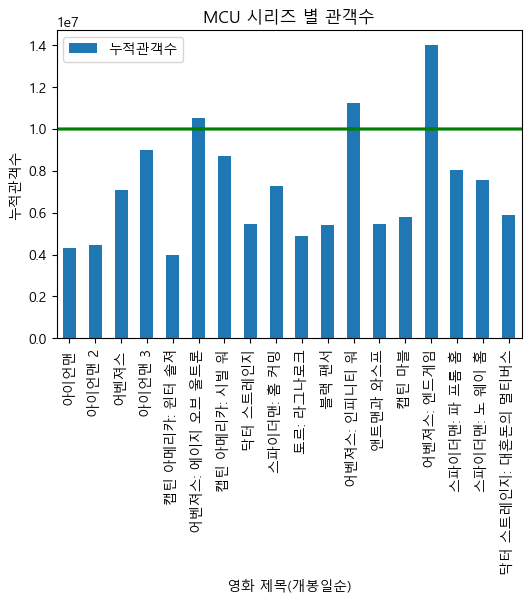

In [93]:
# mcu시리즈 누적관람객수
result.plot(kind='bar', x='영화', y='누적관객수', figsize=(6, 4))

for title in result['영화'].unique():
    plt.axhline(y=10000000, color='g', label='10M')

plt.title('MCU 시리즈 별 관객수')
plt.xlabel('영화 제목(개봉일순)')
plt.ylabel('누적관객수')
 
plt.show()

## 영화이름 이쁘게~

In [74]:
#  트랜스포머



# 트랜스포머 3
# 트랜스포머
# 트랜스포머: 패자의 역습
# 트랜스포머: 사라진 시대
# 트랜스포머: 최후의 기사

result2 = pd.concat([
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "트랜스포머"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "트랜스포머: 패자의 역습"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "트랜스포머 3"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "트랜스포머: 사라진 시대"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "트랜스포머: 최후의 기사"],
]).sort_values("개봉일")
result2

,영화,누적관객수,개봉일
51,트랜스포머,7402732,2007-06-28
52,트랜스포머: 패자의 역습,7393443,2009-06-24
45,트랜스포머 3,7785189,2011-06-29
103,트랜스포머: 사라진 시대,5295836,2014-06-25
205,트랜스포머: 최후의 기사,2614601,2017-06-21


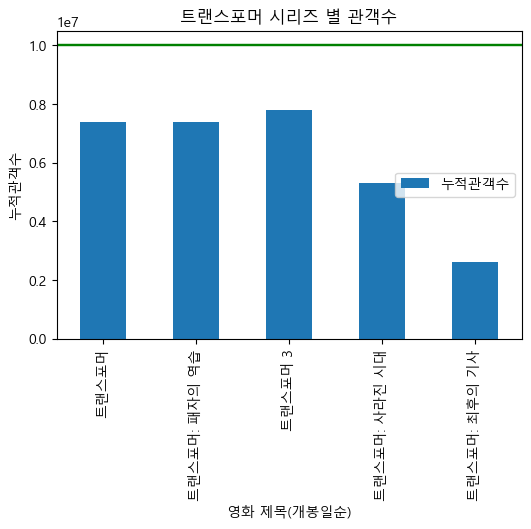

In [92]:
result2.plot(kind='bar', x='영화', y='누적관객수', figsize=(6, 4))

for title in result2['영화'].unique():
    plt.axhline(y=10000000, color='g', label='10M')

plt.title('트랜스포머 시리즈 별 관객수')
plt.xlabel('영화 제목(개봉일순)')
plt.ylabel('누적관객수')
 
plt.show()

## 영화이름 이쁘게~

In [78]:
#  해리포터



# 해리포터와 아즈카반의 죄수
# 해리 포터와 불의 잔
# 해리 포터와 불사조 기사단
# 해리 포터와 혼혈 왕자
# 해리 포터와 죽음의 성물1
# 해리포터와 죽음의 성물2
# 해리포터와 비밀의 방

result1 = pd.concat([
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "해리포터와 죽음의 성물2"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "해리 포터와 불사조 기사단"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "해리 포터와 죽음의 성물1"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "해리포터와 비밀의 방"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "해리 포터와 혼혈 왕자"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "해리포터와 아즈카반의 죄수"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "해리 포터와 불의 잔"],
]).sort_values("개봉일")
result1

,영화,누적관객수,개봉일
204,해리포터와 비밀의 방,4000000,2002-12-13
201,해리포터와 아즈카반의 죄수,2532000,2004-07-16
197,해리 포터와 불의 잔,3499257,2005-12-01
186,해리 포터와 불사조 기사단,3702538,2007-07-11
202,해리 포터와 혼혈 왕자,3002669,2009-07-15
203,해리 포터와 죽음의 성물1,2809053,2010-12-15
146,해리포터와 죽음의 성물2,4426983,2011-07-13


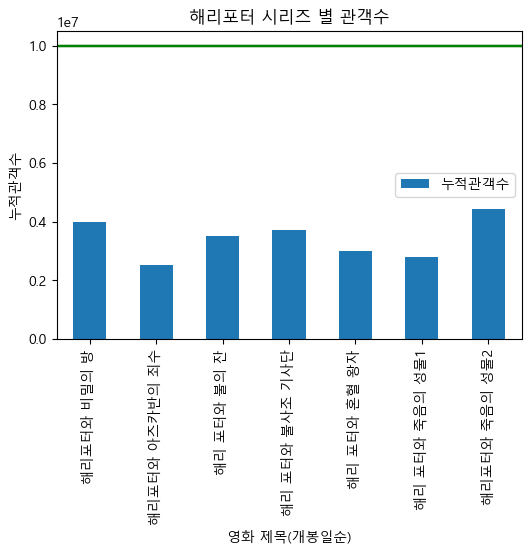

In [91]:
result1.plot(kind='bar', x='영화', y='누적관객수', figsize=(6, 4))

for title in result1['영화'].unique():
    plt.axhline(y=10000000, color='g', label='10M')

plt.title('해리포터 시리즈 별 관객수')
plt.xlabel('영화 제목(개봉일순)')
plt.ylabel('누적관객수')
 
plt.show()

## 영화이름 이쁘게~

In [81]:
# 임파서블

# 미션임파서블:고스트프로토콜
# 미션 임파서블: 폴아웃
# 미션 임파서블: 로그네이션
# 미션 임파서블 3

result3 = pd.concat([
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "미션임파서블:고스트프로토콜"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "미션 임파서블: 폴아웃"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "미션 임파서블: 로그네이션"],
    df.loc[:, ["영화", "누적관객수","개봉일"]][df['영화'] == "미션 임파서블 3"],

]).sort_values("개봉일")
result3

,영화,누적관객수,개봉일
109,미션 임파서블 3,5127047,2006-05-03
48,미션임파서블:고스트프로토콜,7508976,2011-12-15
78,미션 임파서블: 로그네이션,6126488,2015-07-30
72,미션 임파서블: 폴아웃,6584915,2018-07-25


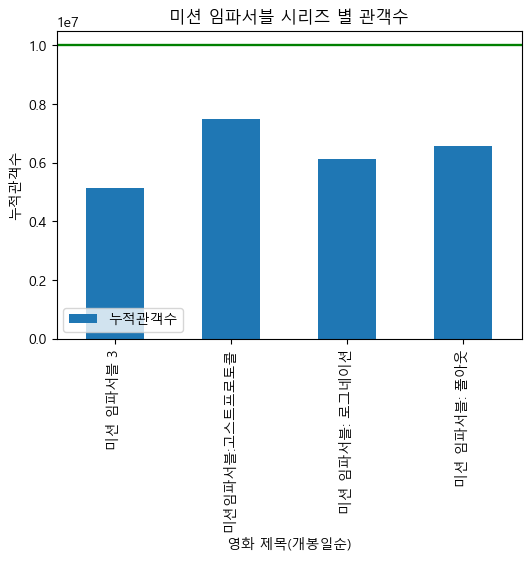

In [90]:
result3.plot(kind='bar', x='영화', y='누적관객수', figsize=(6, 4))

for title in result3['영화'].unique():
    plt.axhline(y=10000000, color='g', label='10M')

plt.title('미션 임파서블 시리즈 별 관객수')
plt.xlabel('영화 제목(개봉일순)')
plt.ylabel('누적관객수')
 
plt.show()

## 영화이름 이쁘게~